Assume you are a Data Analyst in an EdTech company. Your company is focused on accelerating its growth by increasing the number of enrolled users.

Therefore, you have been asked to analyze various aspects of customer acquisition to see the status of new users’ growth in your company. The insights you discover will help your business team in designing a better marketing strategy for your company.

### **Expected Outcome**

1. Brainstorm and identify the right metrics and frame proper questions for analysis. Your analysis should help your Business team to understand the lead's journey and stages with scope for improvements. Business heads to understand their team performance. Managers to understand their target areas.
2. In case you identify any outliers in the data set, make a note of them and exclude them from your analysis.
3. Build the best suitable dashboard presenting your insights.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

##### reading the datasets

In [2]:
leads_basic_details = pd.read_csv("leads_basic_details.csv")
leads_demo_watched_details = pd.read_csv("leads_demo_watched_details.csv")
leads_interaction_details = pd.read_csv("leads_interaction_details.csv")
leads_reasons_for_no_interest = pd.read_csv("leads_reasons_for_no_interest.csv")
sales_managers_assigned_leads_details = pd.read_csv("sales_managers_assigned_leads_details.csv")

##### understanding the data

In [3]:
leads_basic_details.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


**leads_basic_details** contains information of leads

In [5]:
leads_demo_watched_details.head()

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


**leads_demo_watched_details** contains the information related to the demo video watched by the leads - 


date on which the video is watched


language in which the video was watched


% of the video, watched

In [6]:
leads_interaction_details.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [8]:
leads_interaction_details['lead_stage'].unique()

array(['lead', 'awareness', 'consideration', 'conversion'], dtype=object)

**leads_interaction_details** contains information related to the interactions made by junior sales managers with the leads. It mainly contains - 

jnr_sm_id - ID of the Junior Manager who is dealing with the corresponding client

lead_stage - stage of lead's journey from lead to conversion


call status - whether the intended conversation took place with the lead


call_reason - reason for calling and is based on the lead_stage



In [9]:
leads_reasons_for_no_interest.head()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


**leads_reasons_for_no_interest** contains information related to the stage at which a lead has decided not to proceed further, and the reason.

In [10]:
sales_managers_assigned_leads_details.head()

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


**sales_managers_assigned_leads_details** contains ID's of the senior managers, junior managers under them and the corresponding lead IDs

### Data Cleansing

##### leads_basic_details

In [57]:
leads_basic_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            358 non-null    object
 1   age                358 non-null    int64 
 2   gender             358 non-null    object
 3   current_city       358 non-null    object
 4   current_education  358 non-null    object
 5   parent_occupation  358 non-null    object
 6   lead_gen_source    358 non-null    object
dtypes: int64(1), object(6)
memory usage: 22.4+ KB


<AxesSubplot:>

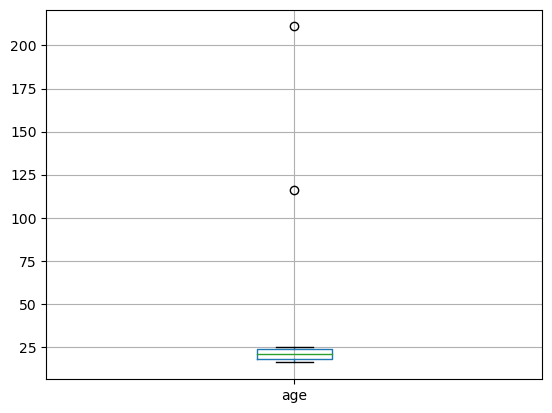

In [12]:
leads_basic_details.boxplot()

In [14]:
leads_basic_details['age'].unique()

array([ 16,  20,  21,  22,  25,  18,  24, 211, 116], dtype=int64)

**Age** has 2 outliers, and are above 100, while the rest of them are below 30. They are 116 and 211, and should be removed

In [17]:
#removing the outliers in age
leads_basic_details = leads_basic_details[~leads_basic_details['age'].isin((116,211))]

In [22]:
leads_basic_details.isna().sum()

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

leads_basic_details does not contains any null data

In [98]:
#check whether the lead_id s start with 'USR' and are followed by 4 to 9 digits(checked upto 9 digits incase of a large lead base)

leads_basic_details['lead_id'].apply(lambda x : re.match('^USR\d{4,10}$',x)).isna().sum()==0

True

All lead_id s follow the pattern of "USR" followed by 4 or more digits

In [34]:
#checking other columns for irrelevant data
for column in leads_basic_details.columns[1:]:
    print(column," ",leads_basic_details[column].unique()," ",end = '\n\n\n')

age   [16 20 21 22 25 18 24]  


gender   ['FEMALE' 'MALE']  


current_city   ['Hyderabad' 'Bengaluru' 'Visakhapatnam' 'Mumbai' 'Chennai' 'Kochi']  


current_education   ['Intermediate' 'B.Tech' 'Degree' 'Looking for Job' '10th Completed'
 'Intermediate Completed']  


parent_occupation   ['Private Employee' 'Business' 'Lawyer' 'IT Employee'
 'Government Employee' 'Doctor' 'Professor/Faculty']  


lead_gen_source   ['social_media' 'user_referrals' 'website' 'SEO' 'email_marketing']  




All the columns seem to have relevant data

##### leads_demo_watched_details

In [58]:
leads_demo_watched_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             191 non-null    object
 1   demo_watched_date   191 non-null    object
 2   language            191 non-null    object
 3   watched_percentage  191 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 7.5+ KB


In [63]:
leads_demo_watched_details.isna().sum()

lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64

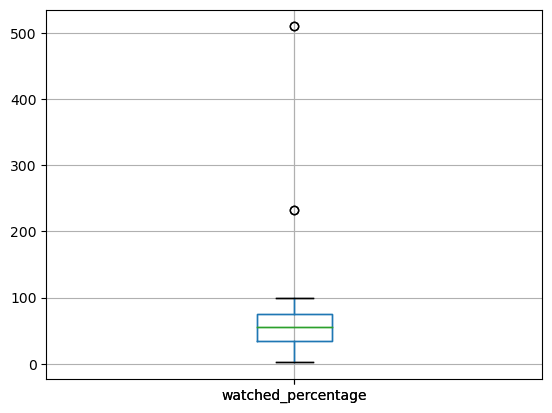

<Figure size 1000x1000 with 0 Axes>

In [44]:
leads_demo_watched_details.boxplot()
plt.figure(figsize = (10,10))
plt.show()

**watched_percentage** has 2 outliers where the value is >100, which is not possible. Hence, they should be removed.

In [97]:
#check whether the lead_id s start with 'USR' and are followed by 4 to 9 digits(checked upto 9 digits incase of a large lead base)

leads_demo_watched_details['lead_id'].apply(lambda x : re.match('^USR\d{4,10}$',x)).isna().sum()==0

True

In [55]:
leads_demo_watched_details = leads_demo_watched_details[leads_demo_watched_details["watched_percentage"]<=100]

In [56]:
#keeping only the lead_ids whose information is present in leads_basic_details

leads_demo_watched_details = leads_demo_watched_details[leads_demo_watched_details['lead_id'].isin(pd.merge(leads_basic_details,leads_demo_watched_details, on = "lead_id", how = "inner")['lead_id'])]

In [59]:
#checking other columns for irrelevant data
for column in leads_demo_watched_details.columns[1:]:
    print(column," ",leads_demo_watched_details[column].unique()," ",end = '\n\n\n')

demo_watched_date   ['1/4/2022' '1/7/2022' '1/2/2022' '1/3/2022' '1/12/2022' '1/11/2022'
 '1/8/2022' '1/10/2022' '1/17/2022' '1/16/2022' '1/18/2022' '2/21/2022'
 '2/19/2022' '1/1/2022' '1/6/2022' '1/9/2022' '1/21/2022' '1/19/2022'
 '2/20/2022' '2/22/2022' '2/25/2022' '2/23/2022' '1/5/2022' '1/20/2022'
 '1/26/2022' '1/13/2022' '1/22/2022' '2/26/2022' '1/14/2022' '2/28/2022'
 '1/25/2022' '2/27/2022']  


language   ['Telugu' 'Hindi' 'English']  


watched_percentage   [ 42  81  35  38  54  52  41  50  48  44  46  51  47  36 100   5  53   8
  10  11  14  17  20  23  55  73  26  29  32  56  59  62  60  65  70  74
  75  68  40  85  71  86  87  88  89   2  90  91  92  77  80  63  83  25
   3   4  30  45  64  37  66  67  49  57  69  61  95  15  12  13  72  19
  27  21  16  76  18  79  78  22  24  28  82  84]  




All the other columns seem to have relevant data

##### leads_interaction_details

In [61]:
leads_interaction_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       2192 non-null   object
 1   lead_id         2192 non-null   object
 2   lead_stage      2192 non-null   object
 3   call_done_date  2192 non-null   object
 4   call_status     2192 non-null   object
 5   call_reason     2192 non-null   object
dtypes: object(6)
memory usage: 102.9+ KB


In [64]:
leads_interaction_details.isna().sum()

jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64

In [96]:
#check whether the jnr_sm_id s start with 'JNR' and are followed by 4 to 9 digits(checked upto 9 digits incase of a large manager base) and end with 'MG'

leads_interaction_details['jnr_sm_id'].apply(lambda x : re.match('^JNR\d{4,10}MG$',x)).isna().sum()==0

True

In [95]:
#check whether the lead_id s start with 'USR' and are followed by 4 to 9 digits(checked upto 9 digits incase of a large lead base)

leads_interaction_details['lead_id'].apply(lambda x : re.match('^USR\d{4,10}$',x)).isna().sum()==0

True

In [67]:
#keeping only the lead_ids whose information is present in leads_basic_details

leads_interaction_details = leads_interaction_details[leads_interaction_details['lead_id'].isin(pd.merge(leads_basic_details,leads_interaction_details, on = "lead_id", how = "inner")['lead_id'])]

In [69]:
#checking other columns for irrelevant data
for column in leads_interaction_details.columns[2:]:
    print(column," ",leads_interaction_details[column].unique()," ",end = '\n\n\n')

lead_stage   ['lead' 'awareness' 'consideration' 'conversion']  


call_done_date   ['1/2/2022' '1/3/2022' '1/4/2022' '1/5/2022' '1/6/2022' '1/7/2022'
 '1/8/2022' '1/9/2022' '1/1/2022' '1/10/2022' '1/12/2022' '1/13/2022'
 '1/11/2022' '1/14/2022' '1/15/2022' '1/16/2022' '1/20/2022' '1/21/2022'
 '1/22/2022' '1/17/2022' '1/18/2022' '1/19/2022' '2/19/2022' '2/21/2022'
 '2/20/2022' '2/22/2022' '2/23/2022' '2/24/2022' '2/25/2022' '1/27/2022'
 '1/28/2022' '1/29/2022' '2/26/2022' '2/27/2022' '2/28/2022' '1/24/2022'
 '1/26/2022' '1/25/2022' '1/23/2022' '3/1/2022']  


call_status   ['successful' 'unsuccessful']  


call_reason   ['lead_introduction' 'demo_schedule' 'post_demo_followup'
 'followup_for_consideration' 'interested_for_conversion'
 'followup_for_conversion' 'successful_conversion' 'demo_not_attended']  




All columns seem to have relevant data

In [71]:
len(leads_interaction_details)

2181

##### leads_reasons_for_no_interest

In [72]:
leads_reasons_for_no_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [103]:
#check whether lead_id s start with 'USR' and are followed by 4 to 9 digits(checked upto 9 digits incase of a large lead base)

leads_reasons_for_no_interest['lead_id'].apply(lambda x : re.match('^USR\d{4,10}$',x)).isna().sum()==0

True

In [73]:
#keeping only the lead_ids whose information is present in leads_basic_details

leads_reasons_for_no_interest = leads_reasons_for_no_interest[leads_reasons_for_no_interest['lead_id'].isin(pd.merge(leads_basic_details,leads_reasons_for_no_interest, on = "lead_id", how = "inner")['lead_id'])]

In [75]:
#checking other columns for irrelevant data
for column in leads_reasons_for_no_interest.columns[1:]:
    print(column," ",leads_reasons_for_no_interest[column].unique()," ",end = '\n\n\n')

reasons_for_not_interested_in_demo   ['No time for student' nan 'Student not interested in domain'
 'Wants offline classes' "Can't afford" 'Cannot afford'
 'Will join in final year']  


reasons_for_not_interested_to_consider   [nan 'No time for student' 'Wants offline classes' "Can't afford"
 'Student not interested in domain' 'Will join in final year']  


reasons_for_not_interested_to_convert   [nan "Can't afford" 'Will join in final year' 'No time for student'
 'Student not interested in domain' 'Wants offline classes']  




All the columns seem to have relevant data

##### sales_managers_assigned_leads_details

In [77]:
sales_managers_assigned_leads_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


292

In [87]:
#check whether the snr_sm_id s start with 'SNR' and are followed by 3 to 9 digits(checked upto 9 digits incase of a large manager base) and end with 'MG'

sales_managers_assigned_leads_details['snr_sm_id'].apply(lambda x : re.match('^SNR\d{3,10}MG$',x)).isna().sum()==0

True

In [92]:
#check whether the jnr_sm_id s start with 'JNR' and are followed by 4 to 9 digits(checked upto 9 digits incase of a large manager base) and end with 'MG'

sales_managers_assigned_leads_details['jnr_sm_id'].apply(lambda x : re.match('^JNR\d{4,10}MG$',x)).isna().sum()==0

True

In [93]:
#check whether the lead_id s start with 'USR' and are followed by 4 to 9 digits(checked upto 9 digits incase of a large lead base)

sales_managers_assigned_leads_details['lead_id'].apply(lambda x : re.match('^USR\d{4,10}$',x)).isna().sum()==0

True

In [99]:
#keeping only the lead_ids whose information is present in leads_basic_details

sales_managers_assigned_leads_details = sales_managers_assigned_leads_details[sales_managers_assigned_leads_details['lead_id'].isin(pd.merge(leads_basic_details,sales_managers_assigned_leads_details, on = "lead_id", how = "inner")['lead_id'])]

In [101]:
#checking other columns for irrelevant data
for column in sales_managers_assigned_leads_details.columns[2:4]:
    print(column," ",sales_managers_assigned_leads_details[column].unique()," ",end = '\n\n\n')

assigned_date   ['1/1/2022' '1/8/2022' '1/15/2022' '2/19/2022']  


cycle   [1 2 3 4]  




All the columns seem to have relevant data

### Saving cleaned datasets

In [104]:
leads_basic_details.to_csv("leads_basic_details_clean.csv", index = False)
leads_demo_watched_details.to_csv("leads_demo_watched_details_clean.csv" , index = False)
leads_interaction_details.to_csv("leads_interaction_details_clean.csv", index = False)
leads_reasons_for_no_interest.to_csv("leads_reasons_for_no_interest_clean.csv", index =False)
sales_managers_assigned_leads_details.to_csv("sales_managers_assigned_leads_details_clean.csv", index= False)


### EDA

In [105]:
#loading datasets into pandas
leads_basic_details_clean = pd.read_csv("leads_basic_details_clean.csv")
leads_demo_watched_details_clean = pd.read_csv("leads_demo_watched_details_clean.csv")
leads_interaction_details_clean = pd.read_csv("leads_interaction_details_clean.csv")
leads_reasons_for_no_interest_clean = pd.read_csv("leads_reasons_for_no_interest_clean.csv")
sales_managers_assigned_leads_details_clean = pd.read_csv("sales_managers_assigned_leads_details_clean.csv")

##### leads_basic_details

In [241]:
leads_basic_details_clean.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


In [125]:
hist.containers

[<BarContainer object of 4 artists>, <BarContainer object of 4 artists>]

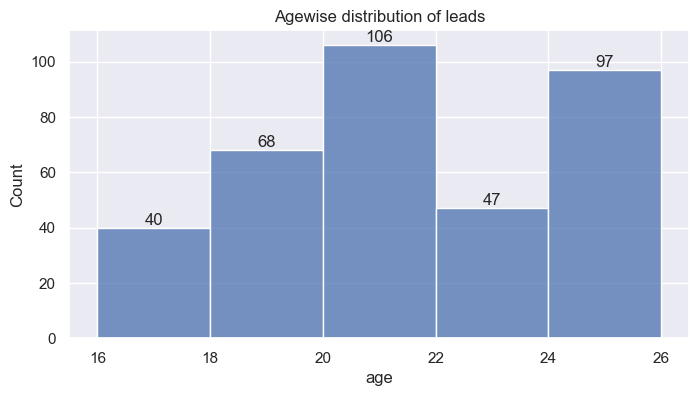

In [242]:
age_hist = sns.histplot(leads_basic_details_clean['age'],bins = np.arange(16,27,2))
age_hist.bar_label(age_hist.containers[0])
plt.title("Agewise distribution of leads")
plt.show()

##### most of the leads are from age groups 20-22(Immediate Graduates) and 24-26(experienced)
##### focus more on age groups 16-18(under grads) and 22-24(post grads)

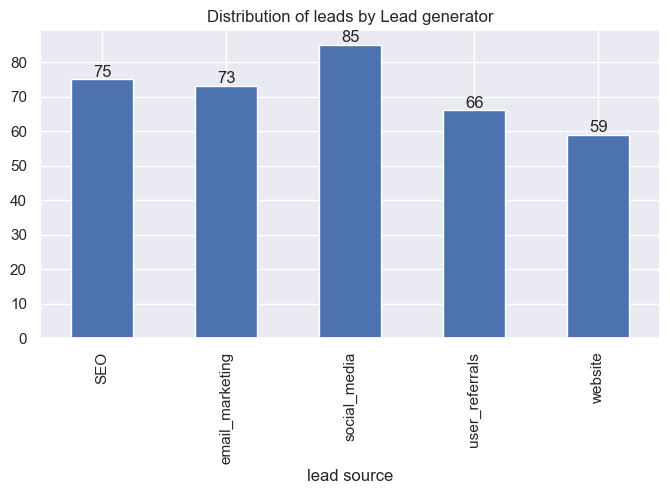

In [243]:
lead_gen_bar = leads_basic_details_clean.groupby(['lead_gen_source'])['lead_id'].count().plot(kind = "bar")
lead_gen_bar.bar_label(lead_gen_bar.containers[0])
plt.title("Distribution of leads by Lead generator")
plt.xlabel("lead source")
plt.show()

##### Most of the leads are from social_media. Increase social media advertising for more leads
##### focus more on user_referrals, like, by offering bonus for referrals
##### try to increase website traffic

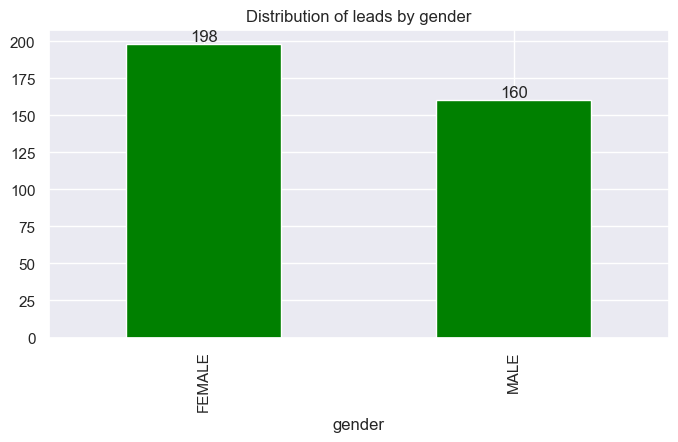

In [244]:
gender_bar = leads_basic_details_clean.groupby(['gender'])['lead_id'].count().plot(kind = "bar",color = 'green')
gender_bar.bar_label(gender_bar.containers[0])
plt.title("Distribution of leads by gender")
plt.show()

C:\Users\krant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


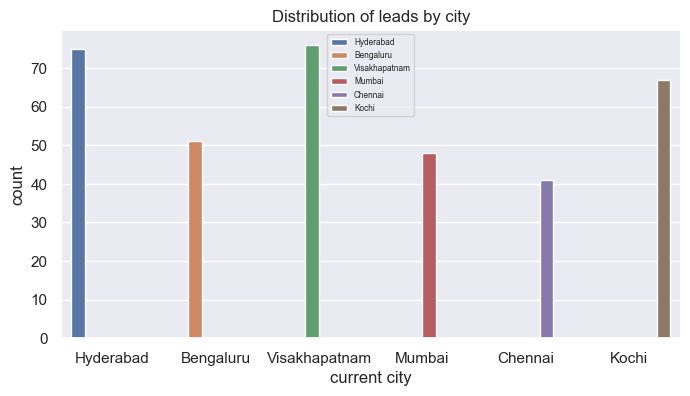

In [247]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(leads_basic_details_clean['current_city'], hue=leads_basic_details_clean['current_city'] )
plt.legend(fontsize = 6, loc =  'upper center')
plt.xlabel('current city')
plt.title("Distribution of leads by city")
plt.show()

##### Most of the leads are from Hyderabad and Vishakapatnam. 
##### focus more on Mumbai, Chennai and Bengaluru

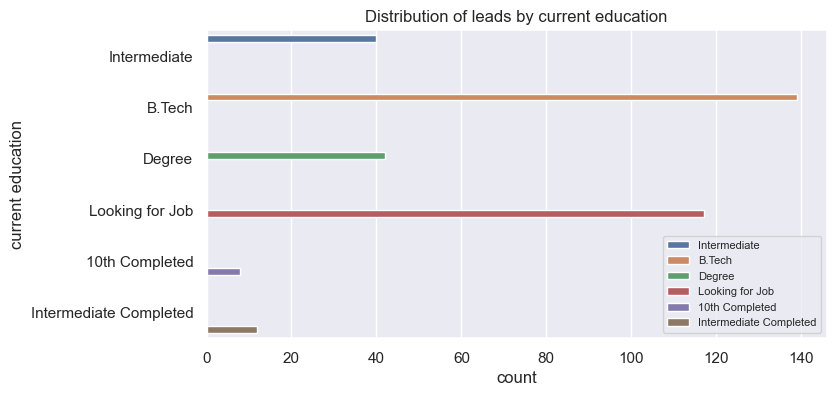

In [248]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(y = leads_basic_details_clean['current_education'], hue=leads_basic_details_clean['current_education'] )
plt.legend(fontsize = 8, loc =  'lower right')
plt.ylabel('current education')
plt.title("Distribution of leads by current education")
plt.show()

##### focus more on degree students

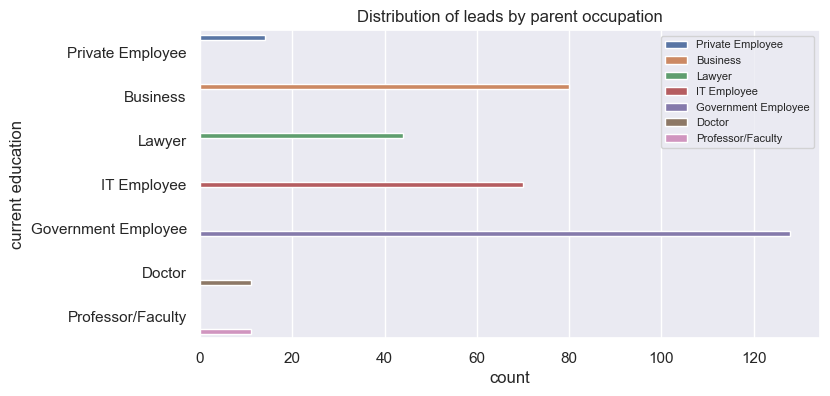

In [265]:
sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(y = leads_basic_details_clean['parent_occupation'], hue=leads_basic_details_clean['parent_occupation'] )
plt.legend(fontsize = 8, loc =  'upper right')
plt.ylabel('current education')
plt.title("Distribution of leads by parent occupation")
plt.show()

#####  findings
most of the leads are from age groups 20-22(Immediate Graduates) and 24-26(experienced)
focus more on age groups 16-18(under grads) and 22-24(post grads)

Most of the leads are from social_media. Increase social media advertising for more leads
focus more on user_referrals, like, by offering bonus for referrals
try to increase website traffic

Most of the leads are from Hyderabad and Vishakapatnam. Probability of finding a lead with potential conversion is high in these areas
focus more on Mumbai, Chennai and Bengaluru

leads from B.Tech and those who are looking for jobs are more likely to be interested
focus more on degree students

Children of government employees are more likely to be interested. Focus more on them

##### leads_demo_watched_details

In [249]:
leads_demo_watched_details_clean.head()

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


In [256]:
days = {0:'Monday',1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
leads_demo_watched_details_clean['day_watched'] = pd.to_datetime(leads_demo_watched_details_clean['demo_watched_date']).dt.dayofweek

In [259]:
leads_demo_watched_details_clean['day_watched'] = leads_demo_watched_details_clean['day_watched'].map(days)

C:\Users\krant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


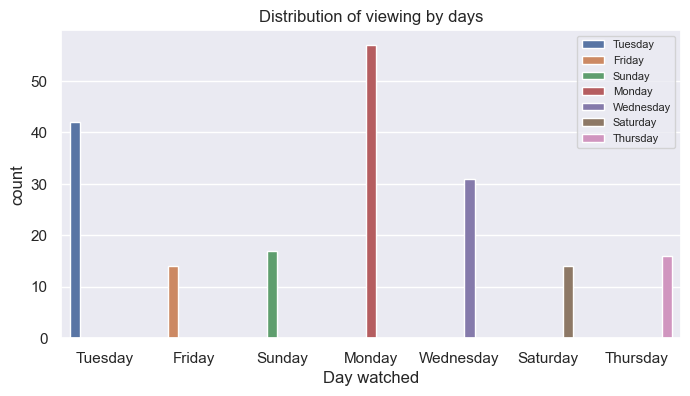

In [261]:
# sns.set(rc={'figure.figsize':(8,4)})
ax = sns.countplot(leads_demo_watched_details_clean['day_watched'], hue=leads_demo_watched_details_clean['day_watched'] )
plt.legend(fontsize = 8)
plt.xlabel('Day watched')
plt.title("Distribution of viewing by days")
plt.show()

Highest views on Monday

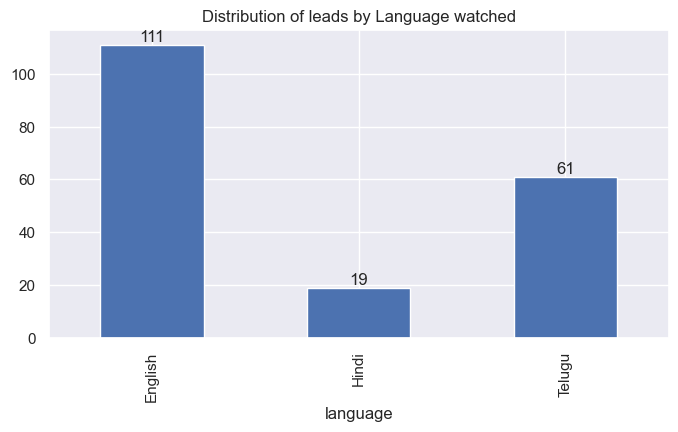

In [263]:
ax = leads_demo_watched_details_clean.groupby(['language'])['lead_id'].count().plot(kind = "bar")
ax.bar_label(ax.containers[0])
plt.title("Distribution of leads by Language watched")
plt.xlabel("language")
plt.show()

English is the most preferred langugage followed by Telugu. Introduce more content in English

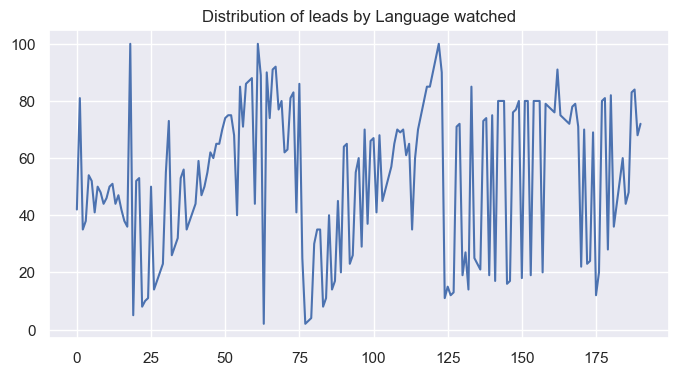

In [279]:
plt.plot(leads_demo_watched_details_clean['watched_percentage'])
plt.title("Distribution of leads by Language watched")
plt.show()

##### Findings

English is the most preferred langugage followed by Telugu. Introduce more content in English

Highest views on Monday

##### leads_interaction_details & leads_reasons_for_no_interest

In [280]:
leads_interaction_details_clean.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [281]:
leads_reasons_for_no_interest_clean.head()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


In [287]:
merged = pd.merge(leads_interaction_details_clean,leads_reasons_for_no_interest_clean,on='lead_id', how = 'outer' )

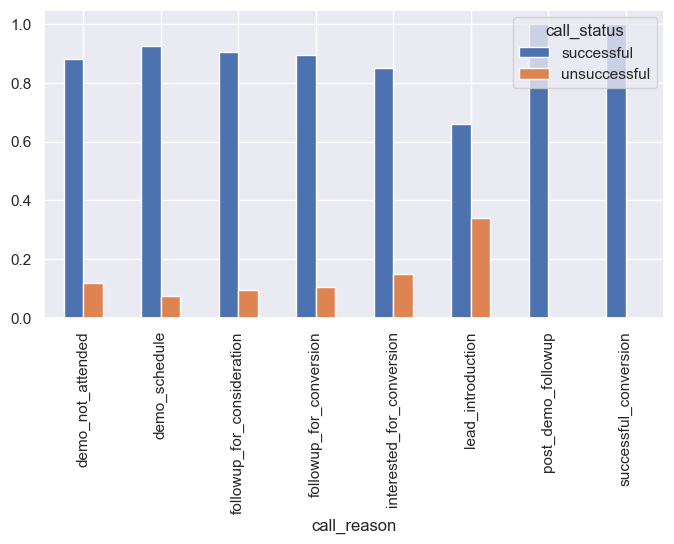

In [292]:
merged.groupby('call_reason')['call_status'].value_counts(normalize= True).unstack().plot.bar()
plt.show()

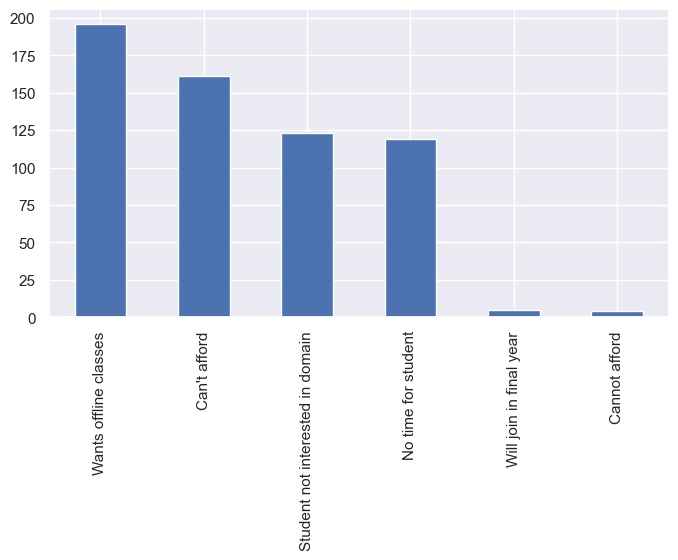

In [300]:
merged["reasons_for_not_interested_in_demo"].value_counts().plot.bar()

plt.show()

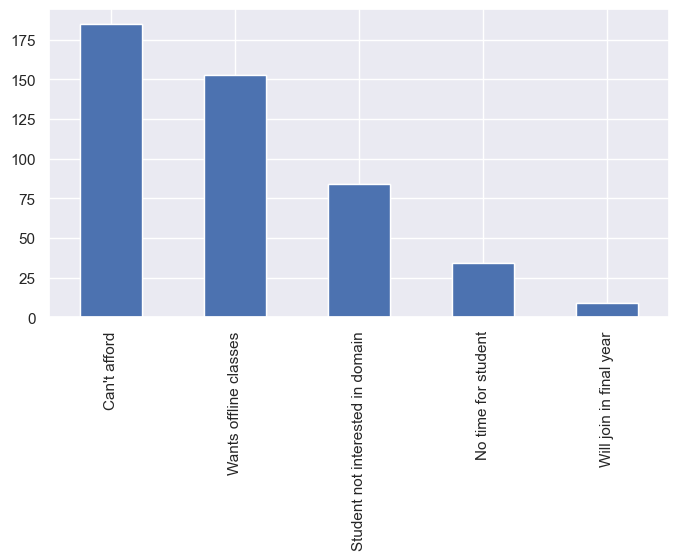

In [298]:
merged["reasons_for_not_interested_to_consider"].value_counts().plot.bar()

plt.show()

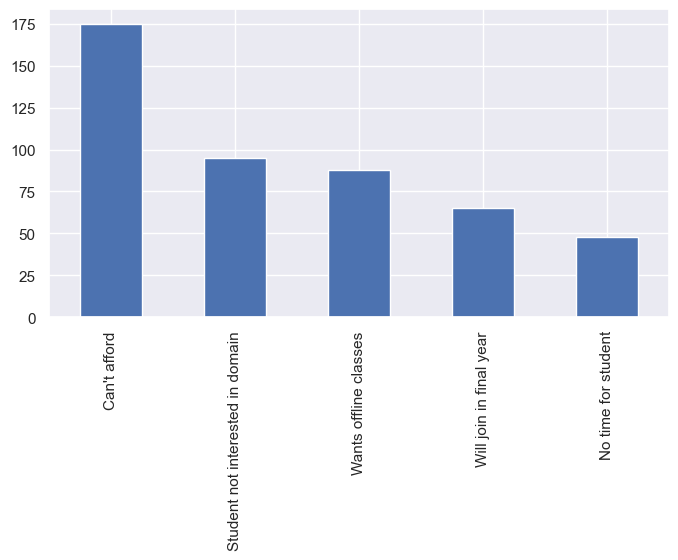

In [299]:
merged["reasons_for_not_interested_to_convert"].value_counts().plot.bar()

plt.show()

##### findings 
lead introduction calls has highest failure rate


try to change prices so that they are more competitive and affordable


bring offline classes

##### sales_managers_assigned_leads_details_clean

In [301]:
sales_managers_assigned_leads_details_clean

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005
...,...,...,...,...,...
353,SNR501MG,JNR1001MG,2/19/2022,4,USR1356
354,SNR501MG,JNR1001MG,1/1/2022,1,USR1357
355,SNR501MG,JNR1001MG,1/8/2022,2,USR1358
356,SNR501MG,JNR1001MG,1/15/2022,3,USR1359


In [305]:
merged = pd.merge(leads_interaction_details_clean,sales_managers_assigned_leads_details_clean,on=['jnr_sm_id','lead_id'], how = 'inner' )

In [306]:
merged

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason,snr_sm_id,assigned_date,cycle
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction,SNR501MG,1/1/2022,1
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule,SNR501MG,1/1/2022,1
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction,SNR501MG,1/1/2022,1
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule,SNR501MG,1/1/2022,1
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup,SNR501MG,1/1/2022,1
...,...,...,...,...,...,...,...,...,...
2176,JNR1001MG,USR1356,lead,2/21/2022,unsuccessful,lead_introduction,SNR501MG,2/19/2022,4
2177,JNR1001MG,USR1357,lead,1/8/2022,unsuccessful,lead_introduction,SNR501MG,1/1/2022,1
2178,JNR1001MG,USR1358,lead,1/12/2022,unsuccessful,lead_introduction,SNR501MG,1/8/2022,2
2179,JNR1001MG,USR1359,lead,1/22/2022,unsuccessful,lead_introduction,SNR501MG,1/15/2022,3


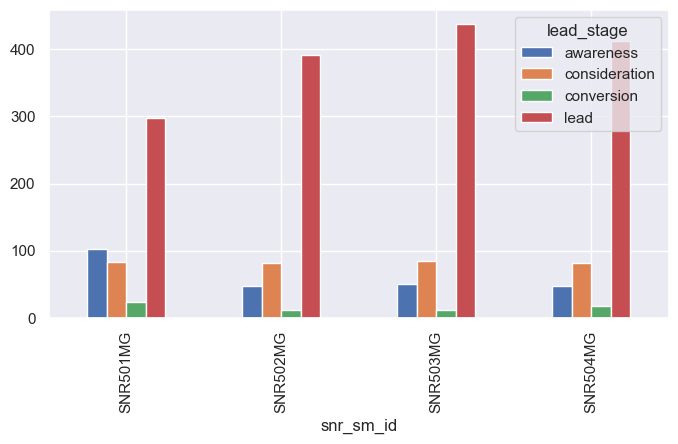

In [308]:
merged.groupby('snr_sm_id')['lead_stage'].value_counts().unstack().plot.bar()
plt.show()

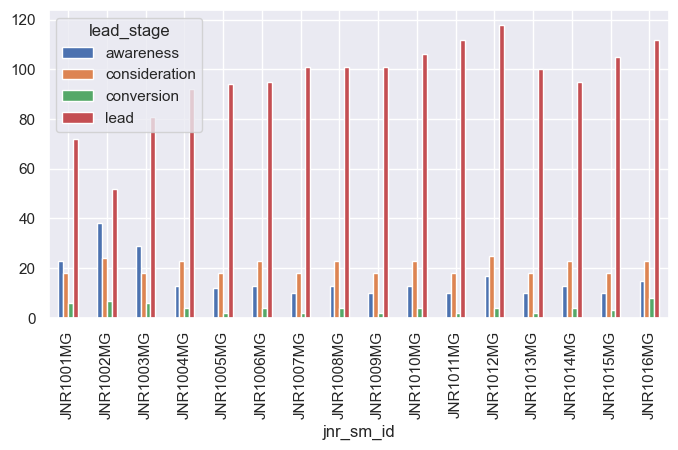

In [311]:
merged.groupby('jnr_sm_id')['lead_stage'].value_counts().unstack().plot.bar()
plt.show()

##### findings
assign more Junior managers to SNR503MG


focus on SNR501MG and encourage for more leads

encourage JNR1001MG and JNR1002MG, like, by incentivizing the process

### Overall findings - 

- most of the leads are from age groups 20-22(Immediate Graduates) and 24-26(experienced)
- focus more on age groups 16-18(under grads) and 22-24(post grads)

- Most of the leads are from social_media. Increase social media advertising for more leads
- focus more on user_referrals, like, by offering bonus for referrals
- try to increase website traffic

- Most of the leads are from Hyderabad and Vishakapatnam. Probability of finding a lead with potential conversion is high in these areas
- focus more on Mumbai, Chennai and Bengaluru

- leads from B.Tech and those who are looking for jobs are more likely to be interested
- focus more on degree students

- Children of government employees are more likely to be interested. Focus more on them
- English is the most preferred langugage followed by Telugu. Introduce more content in English
- Highest views on Monday

- lead introduction calls has highest failure rate


- try to change prices so that they are more competitive and affordable


- bring offline classes

- assign more Junior managers to SNR503MG


- focus on SNR501MG and encourage for more leads

- encourage JNR1001MG and JNR1002MG, like, by incentivizing the process